In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

### MPL settings

In [36]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Helvetica'

# this one makes the ticks into text in the exported svgs
plt.rcParams['svg.fonttype'] = 'none'

plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

### Get a bar for abundance maps, and haadfs

In [6]:
abundance_maps = (np.load('../../../primary_data/abundance_maps.npz')['arr_0'])/255
print(abundance_maps.shape)

(11, 1024, 1024, 30)


In [21]:
haadf_stack = tf.imread('../../../primary_data/main_mosaic_5by6_haadf.tiff')
print(haadf_stack.shape)
print(haadf_stack.dtype)

(30, 1024, 1024)
uint8


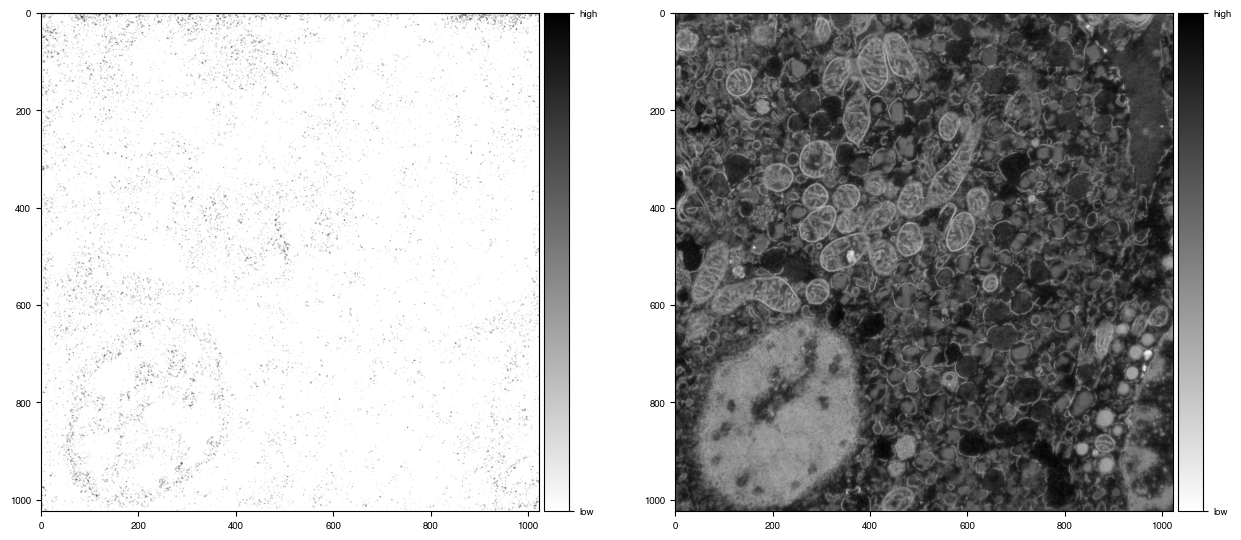

In [38]:
im_abundance = abundance_maps[5,:,:,0]
fig, ax = plt.subplots(1,2,figsize=(15,10))
divider1 = make_axes_locatable(ax[0])
divider2 = make_axes_locatable(ax[1])

# abundance map
im1 = ax[0].imshow(im_abundance,cmap='gray_r')
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cbar1 = plt.colorbar(im1, cax=cax1,ticks=[im_abundance.min(),im_abundance.max()])
cbar1.ax.set_yticklabels(['low','high']) 

# 
im2 = ax[1].imshow(haadf_stack[0,:,:],cmap='gray_r')
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar2 = plt.colorbar(im2, cax=cax2,ticks=[haadf_stack[0,:,:].min(),haadf_stack[0,:,:].max()])
cbar2.ax.set_yticklabels(['low','high']) 

plt.savefig('../svg/figure_colorBars.svg')